In [2]:
%matplotlib inline
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import numpy as np
import matplotlib.pylab as plt
import matplotlib

In [3]:
mnist = fetch_openml('mnist_784', version= 1, as_frame= False)


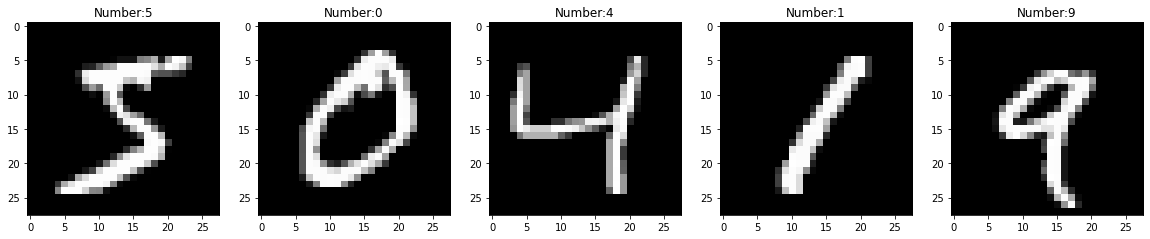

In [4]:
plt.figure(figsize=(20,4))
for index,(image, label) in enumerate(zip(mnist.data[:5], mnist.target[:5])):
    plt.subplot(1,5, index+1)
    plt.imshow(np.reshape(image, (28,28)), cmap='gray')
    plt.title("Number:" +label)

In [5]:
x_train,x_test,y_train,y_test = train_test_split(mnist.data, mnist.target, test_size = 0.2)

In [6]:
model = LogisticRegression(solver = 'lbfgs')
model.fit(x_train,y_train)
predictions = model.predict(x_test)
score = model.score(x_test, y_test)
print(score)

0.9188571428571428
C:\Users\yash.patil\Anaconda3\envs\digitmnist\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Prediction =4


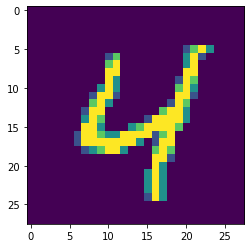

In [7]:
index=0
plt.imshow(np.reshape(x_test[index],(28,28)))
print('Prediction =' +model.predict([x_test[0]])[0])

In [8]:
#we derive the confusion matrix and beautify it....
cm = metrics.confusion_matrix(y_test,predictions)
cm

array([[1315,    0,    2,    1,    4,   19,    8,    2,    7,    1],
       [   1, 1569,    9,    7,    0,    7,    1,    1,   31,    4],
       [   9,   21, 1280,   34,   23,    7,   29,   14,   43,    5],
       [   5,    4,   30, 1330,    2,   46,    2,   10,   34,   15],
       [   8,    5,    5,    2, 1255,    1,   16,    1,    9,   48],
       [  13,    3,    8,   39,   14, 1041,   23,    5,   33,   10],
       [   8,    5,    9,    1,   12,   18, 1269,    2,    6,    4],
       [   1,    7,   14,    8,    9,    1,    1, 1352,    4,   45],
       [  11,   28,   24,   36,   10,   37,   11,    7, 1260,   17],
       [   7,    5,    3,   17,   36,    7,    1,   34,    9, 1193]],
      dtype=int64)

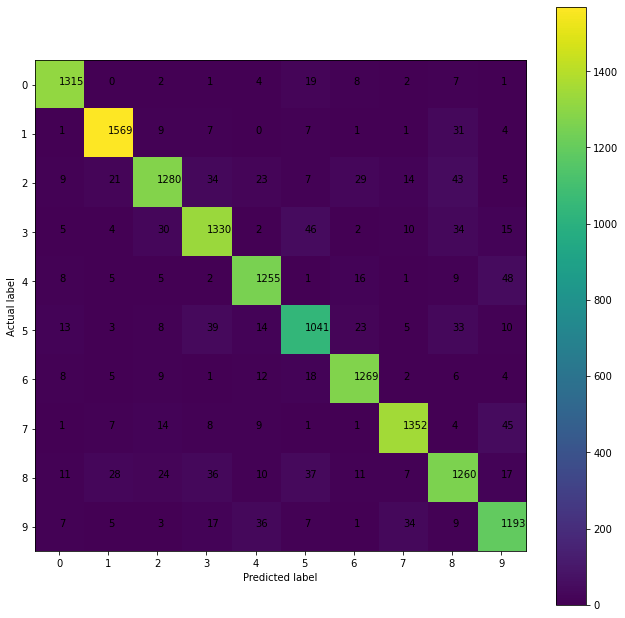

In [9]:
plt.figure(figsize=(11,11))
plt.imshow(cm)
plt.xticks(np.arange(10))
plt.yticks(np.arange(10))

plt.ylabel('Actual label')
plt.xlabel('Predicted label')

plt.colorbar()

width, height = cm.shape
for x in range(width):
    for y in range(height):
        plt.annotate(str(cm[x][y]), xy=(y,x))

In [11]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1359
           1       0.95      0.96      0.96      1630
           2       0.92      0.87      0.90      1465
           3       0.90      0.90      0.90      1478
           4       0.92      0.93      0.92      1350
           5       0.88      0.88      0.88      1189
           6       0.93      0.95      0.94      1334
           7       0.95      0.94      0.94      1442
           8       0.88      0.87      0.88      1441
           9       0.89      0.91      0.90      1312

    accuracy                           0.92     14000
   macro avg       0.92      0.92      0.92     14000
weighted avg       0.92      0.92      0.92     14000

